In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
import numpy as np
import pandas as pd

In [2]:
smile_sodium_citrate = 'C(C(=O)[O-])C(CC(=O)[O-])(C(=O)[O-])O.[Na+].[Na+].[Na+]'
smile_lithium_citrate = '[Li+].[Li+].[Li+].C(C(=O)[O-])C(CC(=O)[O-])(C(=O)[O-])O'

mol_sodium_citrate = Chem.MolFromSmiles(smile_sodium_citrate)
mol_lithum_citrate = Chem.MolFromSmiles(smile_lithium_citrate)

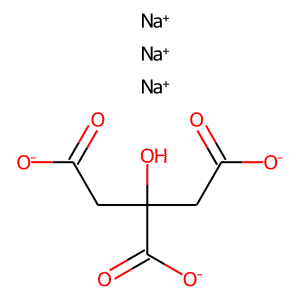

In [3]:
Draw.MolToImage(mol_sodium_citrate)

Sodium citrate (anhydrous) ($C_{6}H_{5}Na_{3}O_{7}$) is freely soluble in water, and has a sour taste. Sodium salts of citric acid are commonly used as a buffers and food preservatives.

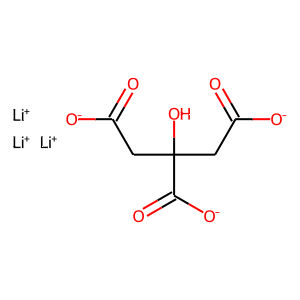

In [4]:
Draw.MolToImage(mol_lithum_citrate)

Lithium citrate (anhydrous) ($C_{6}H_{5}Li_{3}O_{7}$) is used for the treatment of anxiety disorders, bipolar disorder, and depression.

**7-Up** was using Lithium cirate for the lemonade flavour between 1929 and 1948. The U.S. Food and Drug Administration banned the use of lithium in beer and soft drinks in 1948, and 7-Up was reformulated two years later.

These two compounds are indistinguishable on bonds and electron charges. 
Despite the similarity on structure, they have distinctive medical effects.


In [5]:
maccs_sodium_citrate = MACCSkeys.GenMACCSKeys(mol_sodium_citrate).ToList()
maccs_lithum_citrate = MACCSkeys.GenMACCSKeys(mol_lithum_citrate).ToList()

In [6]:
np.where(maccs_sodium_citrate != maccs_lithum_citrate)

(array([], dtype=int64),)

MACCS keys and SMILES are not in an 1-to-1 relationship.
Two compounds have an identical MACCS key.
We have to compare them on alternative finger prints.

Since these compounds are identical in the MACCS feature space, no machine learning model which is trained on MACCS can identify them correctly.
This problem is similar to the challenge araised by Adversarial Learning, where the macine learning model fails to classifier the adversarial example.

In this case, we know the difference based on laboratory tests.
However, when we apply virtual screening for developing new drugs, we may encounter new compounds with a complex structure and the compounds we have never tested before. 
It it crucial to minimize the classification error on the machine learning model.
This example demonstrates that we cannot fully trust the predictions from one single model.

Lithum citrate acts like an adversarial example, if the goal of the machine learning model is to find an alternative compound which has a lemonade flavor. 
Since these compounds are indistinguishable to the machine learning model, it requires additional method to identify the risk of using lithum citrate.
We hypothesis that adversarial defences can be used to build a more robust machine learning model for virtual screening.
